In [1]:
from Learning_Agent import *
from UCB1 import *
from TS import *
import Functions as f
from Enviroment import *
from Clairvoyant import *
from Class import *
import Plots as p

In [2]:
pricing_arms=[10,15,20,25,30]

advertising_arms=range(100,400,3)

In [3]:
cl=Class()

env=Enviroment(5,100,cl)

In [4]:
show_ucb=False
show_beta=False
show_print=False

In [5]:
runs=50
T=365

cum_regret_ucb_multi=[]
cum_reward_ucb_multi=[]
istant_regret_ucb_multi=[]
istant_reward_ucb_multi=[]

cum_regret_ts_multi=[]
cum_reward_ts_multi=[]
istant_regret_ts_multi=[]
istant_reward_ts_multi=[]



for r in range(runs):

    ucb1=UCB1(pricing_arms)
    ts1=TS(pricing_arms)
    clairv_price_1=Clairvoyant_pricing(env , (1,1) ,pricing_arms )
    clairv_bid_1=Clairvoyant_bid(env,(1,1), advertising_arms)


   

    opt_price_1=clairv_price_1.optimal_arm()

    opt_bid_1=clairv_bid_1.optimal_arm(opt_price_1)

    expected_optimal_rew1=clairv_bid_1.expected_reward(opt_bid_1,opt_price_1)

    if show_print:
        print(opt_price_1)
        print(opt_bid_1)
        print(expected_optimal_rew1)







    cum_reward_UCB=[0]
    cum_reward_TS=[0]


    clairvoyant_cum_reward=[0]
    cumulative_optimal_rew=[0]

    cum_regret_UCB=[]
    cum_regret_TS=[]

    regret_UCB=np.zeros(T)+expected_optimal_rew1
    regret_TS=np.zeros(T)+expected_optimal_rew1
    
    reward_UCB=[]
    reward_TS=[]

    clairv_bid_1=Clairvoyant_bid(env,(1,1), advertising_arms)


    for t in range(T):
        cumulative_optimal_rew.append(cumulative_optimal_rew[t]+expected_optimal_rew1)
        pulled_arm1_UCB=ucb1.pull_arm()

        
        opt_bid_1_UCB=clairv_bid_1.optimal_arm(pulled_arm1_UCB)
        
        rewards_UCB=env.round(pulled_arm1_UCB ,opt_bid_1_UCB)
        ucb1.update(pulled_arm1_UCB , rewards_UCB)

        cum_reward_UCB.append(cum_reward_UCB[t]+rewards_UCB[2])
        cum_regret_UCB.append(cumulative_optimal_rew[t+1]-cum_reward_UCB[t+1])
        regret_UCB[t]=regret_UCB[t]-rewards_UCB[2]
        reward_UCB.append(rewards_UCB[2])
        
        
        pulled_arm1_TS=ts1.pull_arm()

        
        opt_bid_1_TS=clairv_bid_1.optimal_arm(pulled_arm1_TS)

        
        rewards_TS=env.round(pulled_arm1_TS ,opt_bid_1_TS)
        ts1.update(pulled_arm1_TS ,rewards_TS )

        
        cum_reward_TS.append(cum_reward_TS[t]+rewards_TS[2])
        cum_regret_TS.append(cumulative_optimal_rew[t+1]-cum_reward_TS[t+1])
        regret_TS[t]=regret_TS[t]-rewards_TS[2]
        reward_TS.append(rewards_TS[2])
        
        
        if show_ucb:
        
            plt.figure(t)
        
            # Plot the points
            plt.scatter(pricing_arms, ucb1.empirical_means, color='blue', label='Empirical mean')

            # Plot the upper confidence bounds as error bars
            uppers=ucb1.empirical_means+ucb1.confidence
            plt.hlines(uppers, xmin=np.array(pricing_arms), xmax=np.array(pricing_arms)+0.3, color='red', linestyles='dashed', label='Upper Bounds')

            # Add labels and legend
            plt.xlabel("arms")
            plt.ylabel('Expected conversion probability')
            plt.legend()

            # Show the plot
            plt.show()
            
        if show_beta:
            a=ts1.beta_params[:,0]
            b=ts1.beta_params[:,1]
            
            means=a/(a+b)   # mean of beta distribution
            
            variance=(a*b)/((a+b)**2 *(a+b+1))
            
            std=np.sqrt(variance)
            quantile_down = norm.ppf(0.025 , means , std)
            
            quantile_up = norm.ppf(0.975 , means , std)
            
            plt.figure(t)
        
            # Plot the points
            plt.scatter(pricing_arms, means, color='blue', label="empirical mean")
            
            plt.errorbar(pricing_arms, means, yerr=quantile_up-means, linestyle='None', color='red', capsize=3)
            # Add labels and legend
            plt.xlabel('X')
            plt.ylabel('Expected conversion probability')
            plt.legend()
            plt.show()
            
            
            
        
        
        if show_print: print(pulled_arm1_UCB ,pulled_arm1_TS )
            
    cum_regret_ucb_multi.append(cum_regret_UCB)
    cum_reward_ucb_multi.append(cum_reward_UCB)
    istant_regret_ucb_multi.append(regret_UCB)
    istant_reward_ucb_multi.append(reward_UCB)
    
    cum_regret_ts_multi.append(cum_regret_TS)
    cum_reward_ts_multi.append(cum_reward_TS)
    istant_regret_ts_multi.append(regret_TS)
    istant_reward_ts_multi.append(reward_TS)
    



C:\Users\carlo\anaconda3\envs\stan_env\lib\site-packages\scipy\stats\_distn_infrastructure.py:2128: RuntimeWarning: invalid value encountered in multiply
  lower_bound = _a * scale + loc
C:\Users\carlo\anaconda3\envs\stan_env\lib\site-packages\scipy\stats\_distn_infrastructure.py:2129: RuntimeWarning: invalid value encountered in multiply
  upper_bound = _b * scale + loc


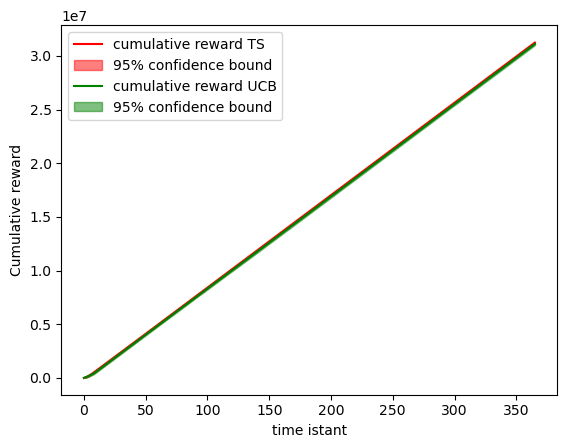

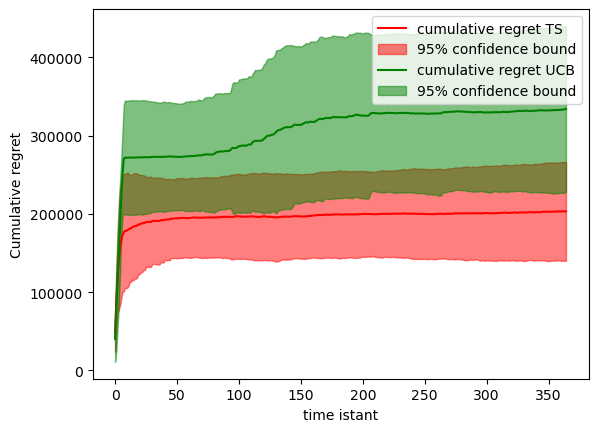

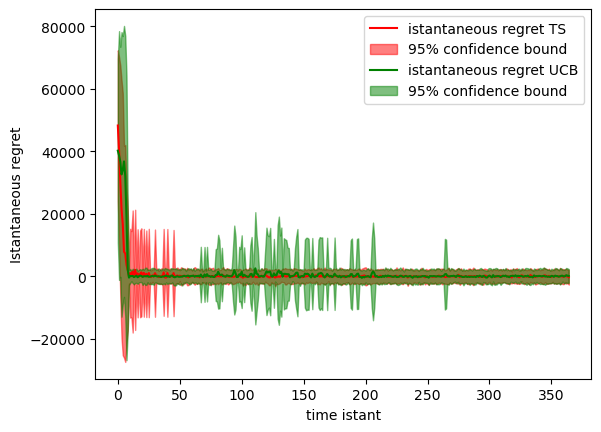

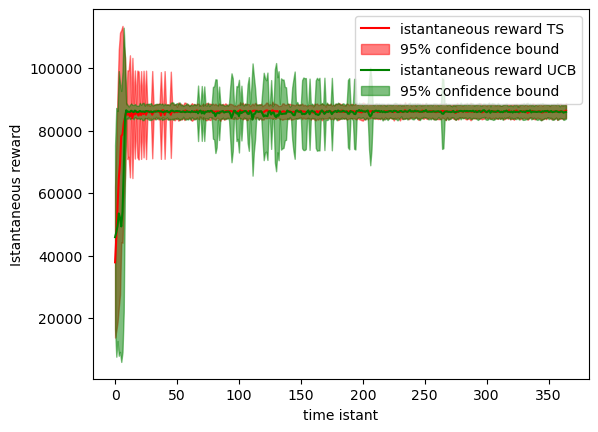

In [6]:
x=[i for i in range(T+1)]
arr1=np.array(cum_reward_ts_multi)
arr2=np.array(cum_reward_ucb_multi)
p.plot_comparison(x, arr1,arr2,"cumulative reward TS", "cumulative reward UCB","Cumulative reward")

x=[i for i in range(T)]
arr1=np.array(cum_regret_ts_multi)
arr2=np.array(cum_regret_ucb_multi)
p.plot_comparison(x, arr1,arr2,"cumulative regret TS", "cumulative regret UCB","Cumulative regret")

x=[i for i in range(T)]
arr1=np.array(istant_regret_ts_multi)
arr2=np.array(istant_regret_ucb_multi)
p.plot_comparison(x, arr1,arr2,"istantaneous regret TS", "istantaneous regret UCB","Istantaneous regret")

x=[i for i in range(T)]
arr1=np.array(istant_reward_ts_multi)
arr2=np.array(istant_reward_ucb_multi)
p.plot_comparison(x, arr1,arr2,"istantaneous reward TS", "istantaneous reward UCB","Istantaneous reward")
